In [21]:
import tabulate
from itertools import product

In [17]:
def display(board):
  print(tabulate.tabulate(board, tablefmt = 'grid'))

In [63]:
k = 10
n = 8
board = [[[0] * n for _ in range(n)] for _ in range(n * n)]
neighborhood = lambda r, c: [(r - 1, c), (r + 1, c), (r, c - 1), (r, c + 1)]
in_bounds = lambda r, c: 0 <= r < n and 0 <= c < n
for i in range(n * n):
    r, c = i // n, i % n
    board[i][r][c] = 1
on_corner = lambda r, c: (r == 0 and c == 0) or (r == 0 and c == n - 1) or (r == n - 1 and c == 0) or (r == n - 1 and c == n - 1)
on_boundary = lambda r, c: r == 0 or r == n - 1 or c == 0 or c == n - 1
# print(board)
for i in range(1, k + 1):
    # print('steps: ', i)
    nboard = [[[0] * n for _ in range(n)] for _ in range(n * n)]
    for j, r, c in product(range(n * n), range(n), range(n)):
        p = 3 if on_boundary(r, c) else 4
        p = 2 if on_corner(r, c) else p
        for nr, nc in neighborhood(r, c):
            if in_bounds(nr, nc):
                nboard[j][nr][nc] += board[j][r][c] / p
    board = nboard
    # display(board[0])
"""
probability that first robot is not in that cell at kth step, 1 - probability robot exists in that cell at kth step
so it should be multiplied, because you want the probability of the sequence that robot1, robot2, robot3 are all not at that cell
so how to do this for all.
low*high = low 
low*low = low
high*high = high
"""
res = [[1] * n for _ in range(n)]
for i, r, c in product(range(n * n), range(n), range(n)):
    res[r][c] *= (1 - board[i][r][c])
sum_ = sum(sum(row) for row in res)
print(f"{sum_:0.6f}")

23.120740


In [2]:
from collections import defaultdict
snow = defaultdict(list)
for k in range(2, 20):
    nodes = 0
    delta = 1
    for _ in range(20):
        delta *= k
        nodes += delta
        snow[k].append(nodes)

In [4]:
for k in range(2, 20):
    print('k', k)
    print('values', snow[k])

k 2
values [2, 6, 14, 30, 62, 126, 254, 510, 1022, 2046, 4094, 8190, 16382, 32766, 65534, 131070, 262142, 524286, 1048574, 2097150]
k 3
values [3, 12, 39, 120, 363, 1092, 3279, 9840, 29523, 88572, 265719, 797160, 2391483, 7174452, 21523359, 64570080, 193710243, 581130732, 1743392199, 5230176600]
k 4
values [4, 20, 84, 340, 1364, 5460, 21844, 87380, 349524, 1398100, 5592404, 22369620, 89478484, 357913940, 1431655764, 5726623060, 22906492244, 91625968980, 366503875924, 1466015503700]
k 5
values [5, 30, 155, 780, 3905, 19530, 97655, 488280, 2441405, 12207030, 61035155, 305175780, 1525878905, 7629394530, 38146972655, 190734863280, 953674316405, 4768371582030, 23841857910155, 119209289550780]
k 6
values [6, 42, 258, 1554, 9330, 55986, 335922, 2015538, 12093234, 72559410, 435356466, 2612138802, 15672832818, 94036996914, 564221981490, 3385331888946, 20311991333682, 121871948002098, 731231688012594, 4387390128075570]
k 7
values [7, 56, 399, 2800, 19607, 137256, 960799, 6725600, 47079207, 32955

In [6]:
import math
from typing import *
def prime_factors(num: int) -> List[int]:
    factors = []
    while num % 2 == 0:
        factors.append(2)
        num //= 2
    for i in range(3, math.isqrt(num) + 1, 2):
        while num % i == 0:
            factors.append(i)
            num //= i
    if num > 2:
        factors.append(num)
    return factors

In [7]:
for k in range(2, 20):
    print('k', k)
    for v in snow[k]:
        print(v, prime_factors(v))

k 2
2 [2]
6 [2, 3]
14 [2, 7]
30 [2, 3, 5]
62 [2, 31]
126 [2, 3, 3, 7]
254 [2, 127]
510 [2, 3, 5, 17]
1022 [2, 7, 73]
2046 [2, 3, 11, 31]
4094 [2, 23, 89]
8190 [2, 3, 3, 5, 7, 13]
16382 [2, 8191]
32766 [2, 3, 43, 127]
65534 [2, 7, 31, 151]
131070 [2, 3, 5, 17, 257]
262142 [2, 131071]
524286 [2, 3, 3, 3, 7, 19, 73]
1048574 [2, 524287]
2097150 [2, 3, 5, 5, 11, 31, 41]
k 3
3 [3]
12 [2, 2, 3]
39 [3, 13]
120 [2, 2, 2, 3, 5]
363 [3, 11, 11]
1092 [2, 2, 3, 7, 13]
3279 [3, 1093]
9840 [2, 2, 2, 2, 3, 5, 41]
29523 [3, 13, 757]
88572 [2, 2, 3, 11, 11, 61]
265719 [3, 23, 3851]
797160 [2, 2, 2, 3, 5, 7, 13, 73]
2391483 [3, 797161]
7174452 [2, 2, 3, 547, 1093]
21523359 [3, 11, 11, 13, 4561]
64570080 [2, 2, 2, 2, 2, 3, 5, 17, 41, 193]
193710243 [3, 1871, 34511]
581130732 [2, 2, 3, 7, 13, 19, 37, 757]
1743392199 [3, 1597, 363889]
5230176600 [2, 2, 2, 3, 5, 5, 11, 11, 61, 1181]
k 4
4 [2, 2]
20 [2, 2, 5]
84 [2, 2, 3, 7]
340 [2, 2, 5, 17]
1364 [2, 2, 11, 31]
5460 [2, 2, 3, 5, 7, 13]
21844 [2, 2, 43, 127]


Traceback (most recent call last):
  File "c:\Users\LZ6RL7\Miniconda3\envs\programming\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\LZ6RL7\AppData\Local\Temp\ipykernel_22916\1499268513.py", line 4, in <module>
    print(v, prime_factors(v))
             ^^^^^^^^^^^^^^^^
  File "C:\Users\LZ6RL7\AppData\Local\Temp\ipykernel_22916\265160835.py", line -1, in prime_factors
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\LZ6RL7\Miniconda3\envs\programming\Lib\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LZ6RL7\Miniconda3\envs\programming\Lib\site-packages\IPython\core\ultratb.py", line 1396, in structured_traceback
    return FormattedTB.structured_trac

In [14]:
print(f"{10**20:,}")

100,000,000,000,000,000,000


In [25]:
for n in range(3, 64):
    for k in range(2, 1_000_000_000):
        if k**n > 10**18:
            print('n', n, 'k', k)
            break


n 3 k 1000001
n 4 k 31623
n 5 k 3982
n 6 k 1001
n 7 k 373
n 8 k 178
n 9 k 101
n 10 k 64
n 11 k 44
n 12 k 32
n 13 k 25
n 14 k 20
n 15 k 16
n 16 k 14
n 17 k 12
n 18 k 11
n 19 k 9
n 20 k 8
n 21 k 8
n 22 k 7
n 23 k 7
n 24 k 6
n 25 k 6
n 26 k 5
n 27 k 5
n 28 k 5
n 29 k 5
n 30 k 4
n 31 k 4
n 32 k 4
n 33 k 4
n 34 k 4
n 35 k 4
n 36 k 4
n 37 k 4
n 38 k 3
n 39 k 3
n 40 k 3
n 41 k 3
n 42 k 3
n 43 k 3
n 44 k 3
n 45 k 3
n 46 k 3
n 47 k 3
n 48 k 3
n 49 k 3
n 50 k 3
n 51 k 3
n 52 k 3
n 53 k 3
n 54 k 3
n 55 k 3
n 56 k 3
n 57 k 3
n 58 k 3
n 59 k 3
n 60 k 2
n 61 k 2
n 62 k 2
n 63 k 2


In [28]:
n = 10**18
int(pow(n, 1 / 63)) + 1

2

In [18]:
2**3 - 1

7

In [62]:
print(list(chain(range(2), range(2))))

[0, 1, 0, 1]


In [7]:
print(f"{2**30:,}")

1,073,741,824


In [2]:
for i in range(10):
    x = 5**i
    if len(bin(x)[2:]) > 15: break
    print(bin(x)[2:])
    print(x)

[1, 5, 25, 125, 625, 3125, 15625]

1
1
101
5
11001
25
1111101
125
1001110001
625
110000110101
3125
11110100001001
15625


In [2]:
721.94+946.80

1668.74

In [22]:
-3//5

-1

In [26]:
(-3)%5

2

In [10]:
import math
p = 0.5
x = -math.log(p)
x, math.exp(-x)

(0.6931471805599453, 0.5)

In [28]:
13//5

2

In [30]:
2+2+3+3+3

13

In [21]:
from itertools import accumulate
arr = [2, 3, 1, -6, -1, 1, 2, 3, 2, -5, -5, -1, -1, 5, 1, 2]
psum = list(accumulate(arr, initial = 0))

In [66]:
cands = [-100_000, 0]
cur = 0
for x in psum[1:]:
    if x < 0:
        if cur > 0:
          cands.append(cur)
        cur = 0
    else:
        cur = max(cur, x)
if cur > 0:
    cands.append(cur)
cands, psum, arr

([-100000, 0, 6, 7, 3],
 [0, 2, 5, 6, 0, -1, 0, 2, 5, 7, 2, -3, -4, -5, 0, 1, 3],
 [2, 3, 1, -6, -1, 1, 2, 3, 2, -5, -5, -1, -1, 5, 1, 2])

In [57]:
import matplotlib.pyplot as plt
def graph(i):
  x = list(range(len(arr)))
  y = []
  cur = 0
  flag = False
  for n in arr:
      if cur >= cands[i]:
         flag = True
      cur += n
      if flag and cur < cands[i]:
          cur = cands[i]
      y.append(cur)
  # Creating the scatter plot
  plt.plot(x, y, marker = 'o', linestyle = '-')
  plt.grid(True)

  # Adding labels and title
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.title('Scatter Plot Example')

  # Displaying the plot
  plt.show()

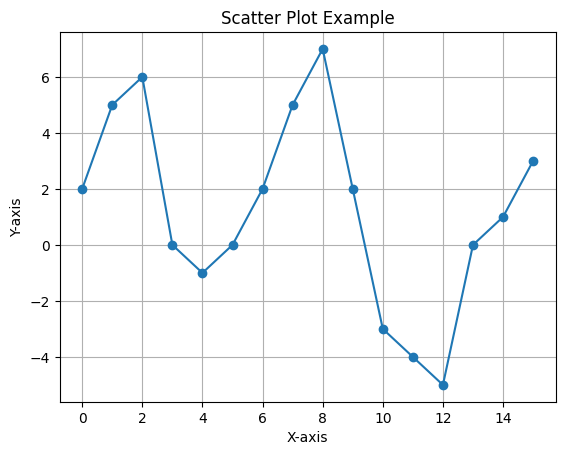

In [60]:
graph(0)

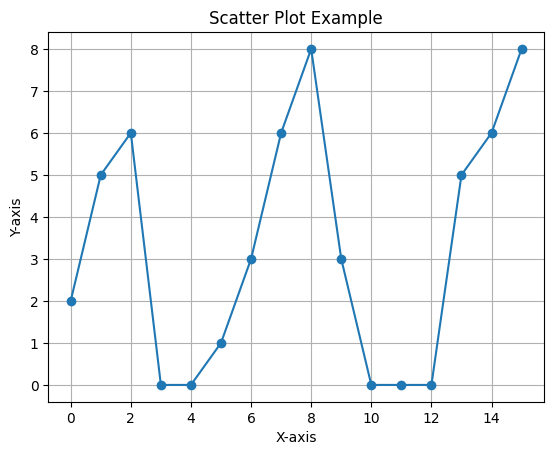

In [61]:
graph(1)

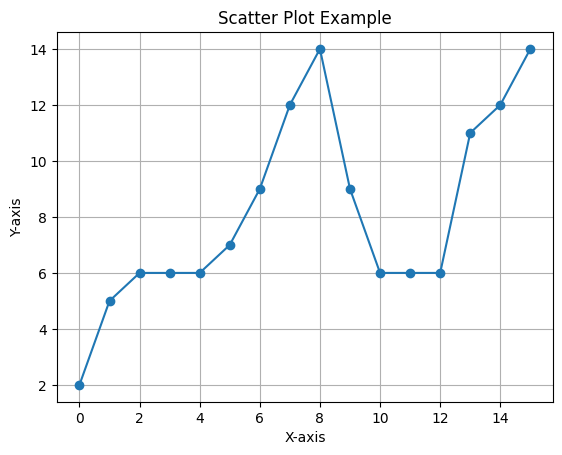

In [62]:
graph(2)

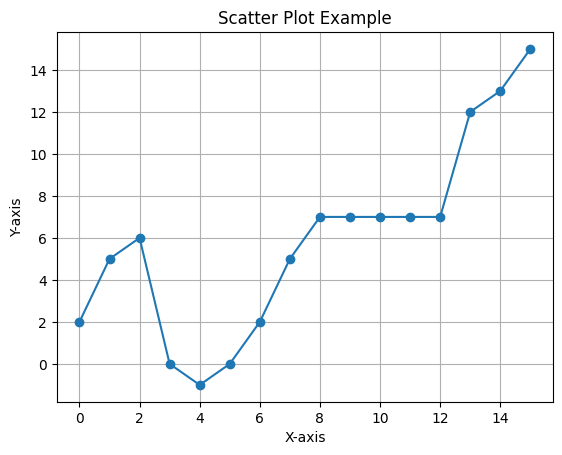

In [63]:
graph(3)

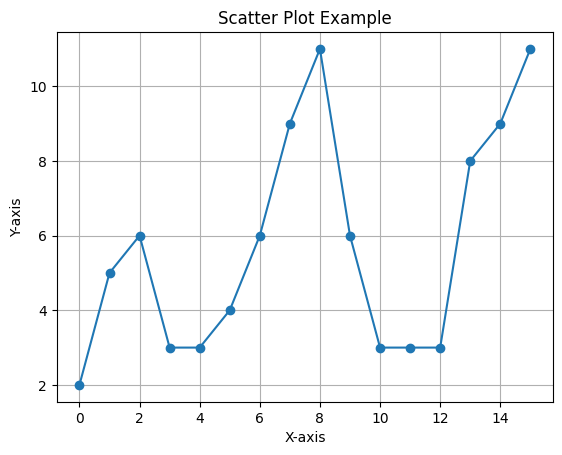

In [64]:
graph(4)

In [1]:
k = 3
v = 3**63
print(f"{v:,}")

1,144,561,273,430,837,494,885,949,696,427


In [4]:
1+2+2**2+2**3+2**4+2**5+2**6+2**7

255

In [9]:
for i in range(2, 1_000_001):
    v = 1 + i + i**2 + i**3
    if v >= 10**18:
        print(f'{v:,}')

1,000,001,000,001,000,001


In [12]:
p = 2
for _ in range(61):
    p += 1
print(p)

63


In [22]:
v = 0
for i in range(60):
    v += 2**i
    if v > 10**18:
        print(i)
print(f"{v:,}")

59
1,152,921,504,606,846,975


In [27]:
for k in range(999_999_980, 1_000_500_000):
    v = 1 + k + k**2
    if v > 10**18:
        print(f"{k:,}", f"{v:,}")
        break

1,000,000,000 1,000,000,001,000,000,001
